# Training Model

In [1]:
#Created Dataset

#these are all image files 

TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import os

In [3]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [5]:
# Train from scratch
train_datagen = image.ImageDataGenerator(  #from keras 
    rescale = 1./255,   #help in normalisation
    
    #to take random crops from images 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,  #no vertical flip because we should not invert the xray
)

test_dataset = image.ImageDataGenerator(rescale=1./255)  #only rescaling , no augmentation

In [6]:
train_generator = train_datagen.flow_from_directory(   #train_generator is an obj which has am method flow_from_directory
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [7]:
train_generator.class_indices   #2 classes which are found

{'Covid': 0, 'Normal': 1}

In [8]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [9]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 250s 31s/step - loss: 0.9025 - accuracy: 0.5938 - val_loss: 0.6771 - val_accuracy: 0.6667
Epoch 2/10
8/8 [==============================] - 131s 16s/step - loss: 0.6083 - accuracy: 0.6719 - val_loss: 0.5567 - val_accuracy: 0.8167
Epoch 3/10
8/8 [==============================] - 112s 14s/step - loss: 0.4845 - accuracy: 0.7695 - val_loss: 0.4011 - val_accuracy: 0.8833
Epoch 4/10
8/8 [==============================] - 114s 14s/step - loss: 0.2891 - accuracy: 0.8984 - val_loss: 0.1231 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 111s 14s/step - loss: 0.2158 - accuracy: 0.9336 - val_loss: 0.1043 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 105s 13s/step - loss: 0.2323 - accuracy: 0.9297 - val_loss: 0.1136 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 106s 13s/step - loss: 0.2021 - accuracy: 0.9258 - val_loss: 0.0826 - val_accuracy: 0.9667
Epoch 8/10
8/8 [====

In [11]:
model.save("model_adv.h5")

In [12]:
model.evaluate_generator(train_generator)

[0.032667938619852066, 0.9732142686843872]

In [13]:
model.evaluate_generator(validation_generator)

[0.04450663551688194, 1.0]

# Test Images

In [14]:
model = load_model("model_adv.h5")

In [16]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [17]:
y_actual= []
y_test =[]

In [20]:
for i in os.listdir("CovidDataset/Val/Normal/"):
    img = image.load_img("CovidDataset/Val/Normal/"+ i , target_size=(224,224))
    img = np.expand_dims(img, axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [22]:
for i in os.listdir("CovidDataset/Val/Covid/"):
    img = image.load_img("CovidDataset/Val/Covid/"+ i , target_size=(224,224))
    img = np.expand_dims(img, axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [23]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [25]:
#Compute confusion matrix to evaluate the accuracy of a classification. By definition a confusion matrix is such that C i , j is equal to the number of observations known to be in group and predicted to be in group .

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cm=confusion_matrix(y_actual,y_test)

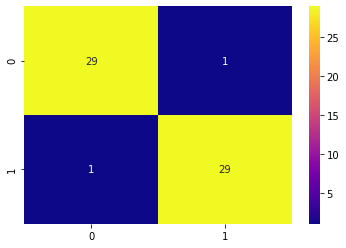

In [29]:
import seaborn as sns

sns.heatmap(cm,cmap="plasma",annot=True)